In [1]:
#XGBoost
import pandas as pd
import numpy as np

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
import xgboost as xgb

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline

In [11]:
from os.path import dirname, join
from pathlib import Path
ROOT_DIR = dirname(os.path.abspath('ARCH7211-SPRING2021')) # This is your Project Root
data_PATH = join(ROOT_DIR,"data","room_info.csv")  # requires `import os`

# input data
data = pd.read_csv(r'C:\Users\milad\Documents\GitHub\arch7211-spring2021\data\room_info.csv')

In [12]:
exclusion = ["Undefined","UserDefined","Other"]
merge = {
    "Sauna": "Bath",
    "Den":'LivingRoom',
    "Library": "Office",
    "DressingRoom":'Closet'
}

data["type_cleaned"] = data["type"].apply(lambda x: merge.get(x,x))
data["exclude"] = ~data["type"].isin(exclusion)

In [13]:
data_exclude = data[~data["type"].isin(exclusion)]

In [14]:
data_exclude.groupby("type_cleaned",as_index=False).count().sort_values("type_cleaned")

,type_cleaned,path,type,classes,floor_index,num_sides,area,proportion_floor_area,perimeter,compactness,...,contains_Sink,contains_SpaceForAppliance,contains_Stove,contains_Toilet,contains_TumbleDryer,contains_Urinal,contains_WallCabinet,contains_WashingMachine,contains_WaterTap,exclude
0,Alcove,164,164,164,164,164,164,164,164,164,...,164,164,164,164,164,164,164,164,164,164
1,Attic,93,93,93,93,93,93,93,93,93,...,93,93,93,93,93,93,93,93,93,93
2,Basement,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
3,Bath,7288,7288,7288,7288,7288,7288,7288,7288,7288,...,7288,7288,7288,7288,7288,7288,7288,7288,7288,7288
4,Bedroom,7993,7993,7993,7993,7993,7993,7993,7993,7993,...,7993,7993,7993,7993,7993,7993,7993,7993,7993,7993
5,CarPort,279,279,279,279,279,279,279,279,279,...,279,279,279,279,279,279,279,279,279,279
6,Closet,3041,3041,3041,3041,3041,3041,3041,3041,3041,...,3041,3041,3041,3041,3041,3041,3041,3041,3041,3041
7,Dining,954,954,954,954,954,954,954,954,954,...,954,954,954,954,954,954,954,954,954,954
8,DraughtLobby,1667,1667,1667,1667,1667,1667,1667,1667,1667,...,1667,1667,1667,1667,1667,1667,1667,1667,1667,1667
9,Elevated,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [15]:
#Clean input data from the target data
# define features and predictions
X = data_exclude.drop(['path','type','classes','open_to','door_to','contains','type_cleaned','exclude'], axis =1)
y = data_exclude['type']
#Split the data into training data, and test data 
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3)

In [16]:
#XGBOOST
param_dist = {'objective':'binary:logistic', 'n_estimators':400}

clf = xgb.XGBClassifier(**param_dist)
clf.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric= ['merror','mlogloss'],
        verbose=True)
clf_pred = clf.best_iteration.predict(X_test)
# evals_result = clf.evals_result()
print( classification_report(y_test,clf_pred))

lidation_0-merror:0.00415	validation_0-mlogloss:0.02851	validation_1-merror:0.11998	validation_1-mlogloss:0.48905
[237]	validation_0-merror:0.00412	validation_0-mlogloss:0.02835	validation_1-merror:0.11964	validation_1-mlogloss:0.48924
[238]	validation_0-merror:0.00406	validation_0-mlogloss:0.02806	validation_1-merror:0.11978	validation_1-mlogloss:0.48957
[239]	validation_0-merror:0.00401	validation_0-mlogloss:0.02784	validation_1-merror:0.11943	validation_1-mlogloss:0.48974
[240]	validation_0-merror:0.00395	validation_0-mlogloss:0.02763	validation_1-merror:0.11916	validation_1-mlogloss:0.49004
[241]	validation_0-merror:0.00380	validation_0-mlogloss:0.02742	validation_1-merror:0.11902	validation_1-mlogloss:0.49053
[242]	validation_0-merror:0.00380	validation_0-mlogloss:0.02726	validation_1-merror:0.11923	validation_1-mlogloss:0.49079
[243]	validation_0-merror:0.00371	validation_0-mlogloss:0.02700	validation_1-merror:0.11916	validation_1-mlogloss:0.49104
[244]	validation_0-merror:0.0037

AttributeError: 'XGBClassifier' object has no attribute 'best_iteration'

In [21]:
#XGBOOST
param_dist = {'objective':'multi:softprob', 'n_estimators':400}

clf = xgb.XGBClassifier(**param_dist)
clf.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric= 'mlogloss',
        verbose=True)
clf_pred = clf.predict(X_test)
# evals_result = clf.evals_result()
print( classification_report(y_test,clf_pred))

7054	validation_1-mlogloss:0.44607
[123]	validation_0-mlogloss:0.07009	validation_1-mlogloss:0.44645
[124]	validation_0-mlogloss:0.06918	validation_1-mlogloss:0.44709
[125]	validation_0-mlogloss:0.06855	validation_1-mlogloss:0.44743
[126]	validation_0-mlogloss:0.06781	validation_1-mlogloss:0.44793
[127]	validation_0-mlogloss:0.06733	validation_1-mlogloss:0.44839
[128]	validation_0-mlogloss:0.06662	validation_1-mlogloss:0.44882
[129]	validation_0-mlogloss:0.06601	validation_1-mlogloss:0.44927
[130]	validation_0-mlogloss:0.06555	validation_1-mlogloss:0.44950
[131]	validation_0-mlogloss:0.06500	validation_1-mlogloss:0.44981
[132]	validation_0-mlogloss:0.06459	validation_1-mlogloss:0.45015
[133]	validation_0-mlogloss:0.06413	validation_1-mlogloss:0.45074
[134]	validation_0-mlogloss:0.06359	validation_1-mlogloss:0.45113
[135]	validation_0-mlogloss:0.06295	validation_1-mlogloss:0.45144
[136]	validation_0-mlogloss:0.06230	validation_1-mlogloss:0.45192
[137]	validation_0-mlogloss:0.06150	valid

In [26]:
f_import = list(zip(X_train,clf.feature_importances_))
for name,score in sorted(f_import, key = lambda x: x[1], reverse = True):
    print(name,score)

contains_Toilet 0.27650952
contains_Stove 0.24943222
contains_Shower 0.08658632
open_to_CarPort 0.030885171
open_to_Outdoor 0.02265321
contains_CoatCloset 0.02046561
door_to_Bath 0.020390332
contains_BaseCabinet 0.019832203
contains_SaunaStove 0.019486262
num_adjacent_rooms 0.016263215
door_to_Closet 0.01615873
open_to_Closet 0.0113975415
num_adjacent_walls 0.011023901
contains_WashingMachine 0.010487149
open_to_LivingRoom 0.009208178
contains_Sink 0.008814902
door_to_CarPort 0.008096822
open_to_Kitchen 0.007480305
door_to_Sauna 0.0073520634
num_doors 0.007344805
contains_Closet 0.0066221613
contains_Heater 0.0065466017
door_to_Bedroom 0.0060810894
num_adjacent_railings 0.004977657
contains_Refrigerator 0.0046386537
door_to_Elevated 0.0044506174
open_to_Bedroom 0.0041789724
contains_Fireplace 0.003935227
door_to_Outdoor 0.0038652767
contains_SaunaBench 0.0033148304
area 0.0030484176
door_to_DraughtLobby 0.0030306417
num_windows 0.002943884
open_to_Entry 0.0029258055
num_fixtures 0.0029

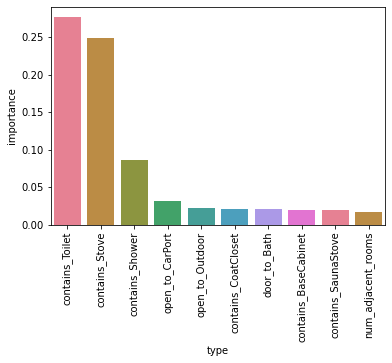

In [48]:
feat_imp = pd.DataFrame(data= {'type':[x[0] for x in f_import] , 'importance':[x[1] for x in f_import]}).sort_values('importance', ascending= False)
feat_imp
fig1 = sns.barplot(x='type',y='importance',data= feat_imp.head(10), palette=sns.color_palette("husl", 8))
plt.xticks(rotation=90)
plt.show()
# sns.lineplot((x[0] for x in f_import) , (x[1] for x in f_import) )



In [52]:
# eval_set = [(X_train, y_train), (X_test, y_test)]
# eval_metric = ["merror","mlogloss"]
# %time clf.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

00445	validation_0-mlogloss:0.02933	validation_1-merror:0.11806	validation_1-mlogloss:0.48987
[237]	validation_0-merror:0.00448	validation_0-mlogloss:0.02908	validation_1-merror:0.11813	validation_1-mlogloss:0.49036
[238]	validation_0-merror:0.00442	validation_0-mlogloss:0.02895	validation_1-merror:0.11827	validation_1-mlogloss:0.49061
[239]	validation_0-merror:0.00439	validation_0-mlogloss:0.02883	validation_1-merror:0.11840	validation_1-mlogloss:0.49102
[240]	validation_0-merror:0.00433	validation_0-mlogloss:0.02873	validation_1-merror:0.11827	validation_1-mlogloss:0.49146
[241]	validation_0-merror:0.00430	validation_0-mlogloss:0.02860	validation_1-merror:0.11827	validation_1-mlogloss:0.49161
[242]	validation_0-merror:0.00430	validation_0-mlogloss:0.02845	validation_1-merror:0.11820	validation_1-mlogloss:0.49186
[243]	validation_0-merror:0.00427	validation_0-mlogloss:0.02832	validation_1-merror:0.11854	validation_1-mlogloss:0.49217
[244]	validation_0-merror:0.00404	validation_0-mlogl

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
#XGBOOST
# param_dist = {'objective':'multi:softprob',
#                         'n_estimators':400,
#                         'learning_rate': 0.01,  
#                         'colsample_bytree' : 1,
#                         'subsample' : 0.8,
#                         'max_depth':5, 
#                         'gamma':0
# }

# clf = xgb.XGBClassifier(**param_dist)
# clf.fit(X_train, y_train,
        
#         eval_set=[(X_train, y_train), (X_test, y_test)],
#         eval_metric= ['merror','mlogloss'],
#         verbose=True)
# clf_pred = clf.predict(X_test)
# # evals_result = clf.evals_result()
# print( classification_report(y_test,clf_pred))

mlogloss:0.66216
[250]	validation_0-merror:0.11307	validation_0-mlogloss:0.59691	validation_1-merror:0.13043	validation_1-mlogloss:0.66048
[251]	validation_0-merror:0.11304	validation_0-mlogloss:0.59506	validation_1-merror:0.13043	validation_1-mlogloss:0.65880
[252]	validation_0-merror:0.11307	validation_0-mlogloss:0.59324	validation_1-merror:0.13036	validation_1-mlogloss:0.65713
[253]	validation_0-merror:0.11289	validation_0-mlogloss:0.59144	validation_1-merror:0.13022	validation_1-mlogloss:0.65543
[254]	validation_0-merror:0.11283	validation_0-mlogloss:0.58964	validation_1-merror:0.13015	validation_1-mlogloss:0.65378
[255]	validation_0-merror:0.11260	validation_0-mlogloss:0.58786	validation_1-merror:0.13002	validation_1-mlogloss:0.65213
[256]	validation_0-merror:0.11251	validation_0-mlogloss:0.58608	validation_1-merror:0.12960	validation_1-mlogloss:0.65051
[257]	validation_0-merror:0.11257	validation_0-mlogloss:0.58434	validation_1-merror:0.12995	validation_1-mlogloss:0.64891
[258]	v

In [66]:
#XGBOOST
param_dist = {'objective':'multi:softprob', 'n_estimators':300, 'learning_rate':0.001}

clf = xgb.XGBClassifier(**param_dist)
clf.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric= ['merror','mlogloss'],
        verbose=True)

lidation_0-merror:0.14014	validation_0-mlogloss:2.46819	validation_1-merror:0.15373	validation_1-mlogloss:2.48246
[137]	validation_0-merror:0.14011	validation_0-mlogloss:2.46438	validation_1-merror:0.15386	validation_1-mlogloss:2.47875
[138]	validation_0-merror:0.14016	validation_0-mlogloss:2.46060	validation_1-merror:0.15386	validation_1-mlogloss:2.47504
[139]	validation_0-merror:0.14016	validation_0-mlogloss:2.45682	validation_1-merror:0.15379	validation_1-mlogloss:2.47135
[140]	validation_0-merror:0.14016	validation_0-mlogloss:2.45307	validation_1-merror:0.15386	validation_1-mlogloss:2.46768
[141]	validation_0-merror:0.14011	validation_0-mlogloss:2.44933	validation_1-merror:0.15386	validation_1-mlogloss:2.46403
[142]	validation_0-merror:0.14008	validation_0-mlogloss:2.44560	validation_1-merror:0.15393	validation_1-mlogloss:2.46039
[143]	validation_0-merror:0.14005	validation_0-mlogloss:2.44190	validation_1-merror:0.15393	validation_1-mlogloss:2.45677
[144]	validation_0-merror:0.1399

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:
clf_pred = clf.predict(X_test)
# evals_result = clf.evals_result()
print( classification_report(y_test,clf_pred))

                precision    recall  f1-score   support

        Alcove       0.81      0.70      0.75        61
         Attic       0.79      0.41      0.54        27
      Basement       0.00      0.00      0.00        15
          Bath       0.96      0.97      0.97      2238
       Bedroom       0.82      0.93      0.87      2361
       CarPort       0.70      0.63      0.66        94
        Closet       0.90      0.92      0.91       808
           Den       0.64      0.46      0.54        91
        Dining       0.89      0.88      0.88       275
  DraughtLobby       0.91      0.91      0.91       500
  DressingRoom       0.55      0.49      0.52        83
      Elevated       0.56      0.33      0.42        27
         Entry       0.91      0.93      0.92      1237
        Garage       0.76      0.83      0.80       125
          Hall       0.55      0.19      0.28        59
       Kitchen       0.97      0.96      0.96      1362
       Library       0.00      0.00      0.00  